(module3-packages1/03-8-scipy)=
# 8. SciPy

# 1. Introduction
SciPy is built on NumPy and offers features such as numerical integration optimization, signal processing and statistical modeling through a toolbox of scientific subpackages

 | Subpackage            | Description                                                       |
|-----------------------|-------------------------------------------------------------------|
| `scipy.integrate`     | Numerical integration (quad, dblquad, odeint, solve_ivp)          |
| `scipy.optimize`      | Optimization algorithms and root finding                          |
| `scipy.interpolate`   | Interpolation of functions and data                               |
| `scipy.fft`           | Fast Fourier Transforms (replaces older `scipy.fftpack`)          |
| `scipy.linalg`        | Linear algebra (built on NumPy but more advanced features)        |
| `scipy.signal`        | Signal processing (filters, convolution, transfer functions)      |
| `scipy.sparse`        | Sparse matrix representations and operations                      |
| `scipy.spatial`       | Spatial algorithms (KD-trees, distances, nearest neighbors)       |
| `scipy.stats`         | Statistical distributions, tests, and descriptive stats           |
| `scipy.constants`     | Physical and mathematical constants                               |
| `scipy.ndimage`       | Multidimensional image processing                                 |
| `scipy.io`            | Input/output for formats like MATLAB, WAV, etc.                   |
| `scipy.cluster`       | Clustering algorithms (k-means, hierarchy)                        |



# 2. SciPy Constants

| Symbol | Value | Meaning |
|--------|-------|---------|
| N_A | 6.02214076e+23 mol^-1 | Avogadro constant |
| k | 1.380649e-23 J K^-1 | Boltzmann constant |
| R | 8.314462618 J mol^-1 K^-1 | Molar gas constant |
| F | 96485.33212 C mol^-1 | Faraday constant |
| e | 1.602176634e-19 C | Elementary charge |
| m_e | 9.1093837015e-31 kg | Electron mass |
| m_p | 1.67262192369e-27 kg | Proton mass |
| m_n | 1.67492749804e-27 kg | Neutron mass |
| h | 6.62607015e-34 J s | Planck constant |
| c | 299792458.0 m s^-1 | Speed of light in vacuum |
| epsilon_0 | 8.8541878128e-12 F m^-1 | Vacuum electric permittivity |
| mu_0 | 1.25663706212e-06 N A^-2 | Vacuum magnetic permeability |
| alpha | 0.0072973525693 | Fine-structure constant |
| a_0 | 5.29177210903e-11 m | Bohr radius |
| E_h | 4.3597447222071e-18 J | Hartree energy |
| G | 6.67430e-11 m^3 kg^-1 s^-2 | Gravitational constant |
| g | 9.80665 m s^-2 | Standard acceleration due to gravity |
| atm | 101325.0 Pa | Standard atmosphere |
| bar | 100000.0 Pa | Bar (unit of pressure) |

This table includes some of the most commonly used physical constants in chemistry, along with their symbols, values, and meanings. The values are taken from the SciPy constants module, which uses the 2018 CODATA recommended values.

In [1]:
#from my_packages import my_pack
#print(my_pack.__file__)

In [2]:
from scipy import constants
#from my_pack import my_fun
#dir(constants)
#my_fun.scrollable_box(dir(constants), height='150px')

In [3]:
from scipy import constants

constants_list = []
for name in dir(constants):
    if name.startswith('__'):
        continue
    val = getattr(constants, name)
    if isinstance(val, (int, float)):
        constants_list.append(f"{name}: {val}")

In [4]:
from scipy.constants import physical_constants

phys_list = []
for name, (value, unit, _) in sorted(physical_constants.items()):
    phys_list.append(f"{name}: {value} {unit}")

# 3. Scipy.integrate

| Function/Method | Description |
|-----------------|-------------|
| quad(func, a, b[, args, full_output, ...]) | Compute a definite integral |
| dblquad(func, a, b, gfun, hfun[, args, ...]) | Compute a double integral |
| tplquad(func, a, b, gfun, hfun, qfun, rfun[, ...]) | Compute a triple integral |
| nquad(func, ranges[, args, opts, full_output]) | Integration over multiple variables |
| fixed_quad(func, a, b[, args, n]) | Compute a definite integral using fixed-order Gaussian quadrature |
| quadrature(func, a, b[, args, tol, rtol, ...]) | Compute a definite integral using fixed-tolerance Gaussian quadrature |
| romberg(function, a, b[, args, tol, rtol, ...]) | Romberg integration of a callable function or method |
| quad_explain([points, weights, a, b, ...]) | Print extra information about integrate.quad() parameters and returns |
| newton_cotes(rn[, equal]) | Return weights and error coefficient for Newton-Cotes integration |
| IntegrationWarning | Warning on issues during integration |
| odeint(func, y0, t[, args, Dfun, col_deriv, ...]) | Integrate a system of ordinary differential equations |
| ode(f[, jac]) | A generic interface class to numeric integrators |
| complex_ode(f[, jac]) | A wrapper of ode for complex systems |
| solve_ivp(fun, t_span, y0[, method, t_eval, ...]) | Solve an initial value problem for a system of ODEs |
| RK23(fun, t0, y0, t_bound[, max_step, rtol, ...]) | Explicit Runge-Kutta method of order 3(2) |
| RK45(fun, t0, y0, t_bound[, max_step, rtol, ...]) | Explicit Runge-Kutta method of order 5(4) |
| DOP853(fun, t0, y0, t_bound[, max_step, ...]) | Explicit Runge-Kutta method of order 8 |
| Radau(fun, t0, y0, t_bound[, max_step, ...]) | Implicit Runge-Kutta method of Radau IIA family of order 5 |
| BDF(fun, t0, y0, t_bound[, max_step, rtol, ...]) | Implicit method based on backward-differentiation formulas |
| LSODA(fun, t0, y0, t_bound[, first_step, ...]) | Adams/BDF method with automatic stiffness detection and switching |
| solve_bvp(fun, bc, x, y[, p, S, fun_jac, ...]) | Solve a boundary-value problem for a system of ODEs |




## scipy.integrate.quad() Adaptive Quadrature (integration technique)
Adaptive quadrature is a numerical integration technique that automatically adjusts its approach based on the behavior of the function being integrated. It uses smaller step sizes in regions where the function is more complex or rapidly changing, and larger step sizes where the function is smoother. 

| Argument         | Type               | Description                                                                 |
|------------------|--------------------|-----------------------------------------------------------------------------|
| `func`           | callable           | The function to integrate (must take a float and return a float).          |
| `a`              | float              | Lower limit of integration.                                                |
| `b`              | float              | Upper limit of integration.                                                |
| `args`           | tuple              | Extra arguments passed to `func`.                                          |
| `full_output`    | bool               | If `True`, return additional output info.                                  |
| `epsabs`         | float              | Absolute error tolerance (default: `1.49e-8`).                             |
| `epsrel`         | float              | Relative error tolerance (default: `1.49e-8`).                             |
| `limit`          | int                | Max number of subintervals (default: 50).                                  |
| `points`         | list of float      | Points to avoid singularities or help convergence (e.g., discontinuities). |
| `weight`         | str (optional)     | Weighting function for weighted integrals (e.g., 'cos', 'sin').            |
| `wvar`           | float              | Variable for the weighting function.                                       |
| `wopts`          | tuple              | Optional parameters for weighting function.                                |
| `maxp1`          | int                | Max number of Chebyshev moments.                                           |
| `limlst`         | int                | Max number of cycles for oscillatory weights.                              |


$$ \int_{0}^{2} x^2 \, dx $$

This equation represents the definite integral of the function f(x) = x² over the interval [0, 2]. The result of this integration is 8/3 or approximately 2.667. quad() returns a tuple as the answer with the second part being the error estimate

In [5]:
 from scipy.integrate import quad
def func(x):
    return x**2

quad(func, 0,2)

(2.666666666666667, 2.960594732333751e-14)


$$ \int_{-1}^{1} \frac{1}{|1-4x^2|} \, dx $$

This equation represents the definite integral of the function f(x) = 1/|1-4x²| over the interval [-1, 1]. 

A few notes about this integral:

1. The absolute value in the denominator (|1-4x²|) ensures that the function is defined for all x in the interval [-1, 1].
2. This integral has vertical asymptotes (singularity) at x = ±1/2, where the denominator becomes zero.
3. Due to the singularity, this integral is improper and may not converge in the usual sense. Special techniques or numerical methods might be needed to evaluate it.
The following code uses a lambda function, which is a short, anonymous function in Python. It's useful when you want to define a function *on the fly* — especially when passing it to another function like `quad`.
```python
import numpy as np
f = lambda x: 1 / np.sqrt(np.abs(1-4*x**2))
quad(f,-1,1)
```
This is equivalent to:

```python
def f(x):
    return 1 / np.sqrt(np.abs(1 - 4 * x**2))
```
<div class="alert alert-info">  
    
<center>The following code pushes an error as you are dividing by zero when x=+/- 1/2</center> 

</div>

In [6]:
import numpy as np
f = lambda x: 1 / np.sqrt(np.abs(1-4*x**2))
quad(f,-1,1)

/tmp/ipykernel_18534/1021973711.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  f = lambda x: 1 / np.sqrt(np.abs(1-4*x**2))
/tmp/ipykernel_18534/1021973711.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad(f,-1,1)


(nan, nan)

To handle the singularity we use the keyword argument `points=[-0.5,0.5]` and quad() splits the integration around those points

In [7]:
f = lambda x: 1 / np.sqrt(np.abs(1-4*x**2))
quad(f,-1,1, points=[-0.5,0.5])

(2.8877542237184186, 3.632489864457966e-10)

### Gausian integral

$$ \int_{-\infty}^{\infty} e^{-x^2} \, dx = \sqrt{\pi}$$

This improper integral represents the Gaussian (bell curve) and is a fundamental integral in mathematics and physics, particularly in probability theory and statistics.

The Python code `quad(lambda x: np.exp(-(x**2)), -np.inf, np.inf)` uses SciPy's `quad` function to numerically evaluate this improper integral from negative infinity to positive infinity.

Interestingly, the exact value of this integral is known to be $\sqrt{\pi}$, which is approximately 1.77245385090551603.

#### Probability Density Function (PDF)
$$
f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2 / 2}
$$

This function is chosen specifically so that the total area under the curve is 1, meaning:

$$
\int_{-\infty}^{\infty} f(x) \, dx = \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \, dx = 1
$$


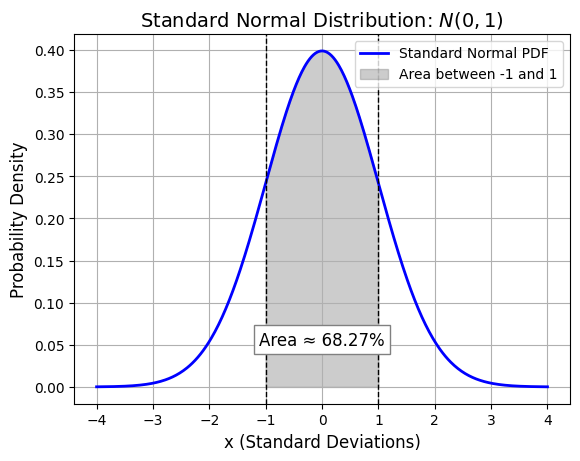

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for x
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)  # Standard normal PDF

# Plot the standard normal distribution curve
plt.plot(x, y, label='Standard Normal PDF', color='blue', linewidth=2)

# Define the interval: from -1 to +1
x_fill = np.linspace(-1, 1, 300)
y_fill = norm.pdf(x_fill)

# Shade the area between -1 and 1
plt.fill_between(x_fill, y_fill, alpha=0.4, color='gray', label='Area between -1 and 1')

# Compute the area (probability) using the CDF
area = norm.cdf(1) - norm.cdf(-1)  # P(-1 < X < 1)
area_percent = area * 100

# Add vertical lines for -1 and +1
plt.axvline(-1, color='black', linestyle='--', linewidth=1)
plt.axvline(1, color='black', linestyle='--', linewidth=1)

# Add annotation with computed area
plt.text(0, 0.05, f'Area ≈ {area_percent:.2f}%', ha='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray'))

# Titles and labels
plt.title('Standard Normal Distribution: $N(0,1)$', fontsize=14)
plt.xlabel('x (Standard Deviations)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

#### From Gaussian Distribution to PDF:
run the following code cell

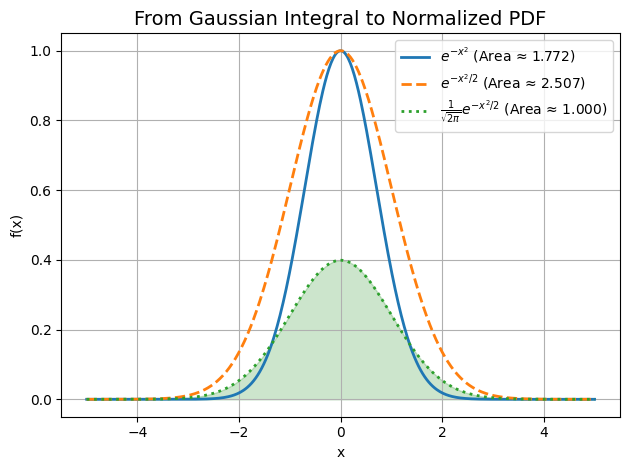

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define x range
x = np.linspace(-5, 5, 500)

# Define all three functions
f1 = np.exp(-x**2)                              # Original Gaussian
f2 = np.exp(-x**2 / 2)                          # Stretched version
f3 = (1 / np.sqrt(2 * np.pi)) * f2              # Normalized standard normal PDF

# Compute areas under each curve
area_f1, _ = quad(lambda x: np.exp(-x**2), -np.inf, np.inf)
area_f2, _ = quad(lambda x: np.exp(-x**2 / 2), -np.inf, np.inf)
area_f3, _ = quad(lambda x: (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2), -np.inf, np.inf)

# Plot each function
plt.plot(x, f1, label=rf'$e^{{-x^2}}$ (Area ≈ {area_f1:.3f})', linewidth=2)
plt.plot(x, f2, label=rf'$e^{{-x^2/2}}$ (Area ≈ {area_f2:.3f})', linewidth=2, linestyle='--')
plt.plot(x, f3, label=rf'$\frac{{1}}{{\sqrt{{2\pi}}}} e^{{-x^2/2}}$ (Area ≈ {area_f3:.3f})',
         linewidth=2, linestyle=':')

# Fill under the normalized PDF
plt.fill_between(x, f3, alpha=0.2, color='green')

# Add titles, labels, and legend
plt.title('From Gaussian Integral to Normalized PDF', fontsize=14)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



- Blue (solid): $ e^{-x^2} $ — the classic Gaussian integral. Area ≈ √π ≈ 1.772
- Orange (dashed): $ e^{-x^2/2} $ — stretched version. Area ≈ √(2π) ≈ 2.506
- Green (dotted): $ \frac{1}{\sqrt{2\pi}} e^{-x^2/2} $ — normalized PDF. Area ≈ 1.000

## Particle in a Box

The “particle in a box” is the generic name for the quantum model where a particle is confined to a finite region of space with infinite potential outside. The dimensionality defines the specific case:

- **1D box**: Particle can only move along one axis.
  $$
  \psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right)
  $$
  → Use `scipy.integrate.quad()`

- **2D box (square well)**: Particle moves in a 2D rectangle or square.
  $$
  \psi_{n,m}(x,y) = \sqrt{\frac{4}{L_x L_y}} \sin\left(\frac{n\pi x}{L_x}\right) \sin\left(\frac{m\pi y}{L_y}\right)
  $$
  → Use `scipy.integrate.dblquad()`

- **3D box (cube or rectangular prism)**: Now you add the z-dimension.
  $$
  \psi_{n,m,l}(x,y,z) = \sqrt{\frac{8}{L_x L_y L_z}} \sin\left(\frac{n\pi x}{L_x}\right) \sin\left(\frac{m\pi y}{L_y}\right) \sin\left(\frac{l\pi z}{L_z}\right)
  $$
  → Use `scipy.integrate.tplquad()`

### 1D Box
The wavefunction is:
$$
\psi_n(x) = \sqrt{\frac{2}{L}} \sin\left(\frac{n\pi x}{L}\right)
$$
The probability density:
$$
|\psi_n(x)|^2 = \frac{2}{L} \sin^2\left(\frac{n\pi x}{L}\right)
$$

1D normalization integral = 1.000000


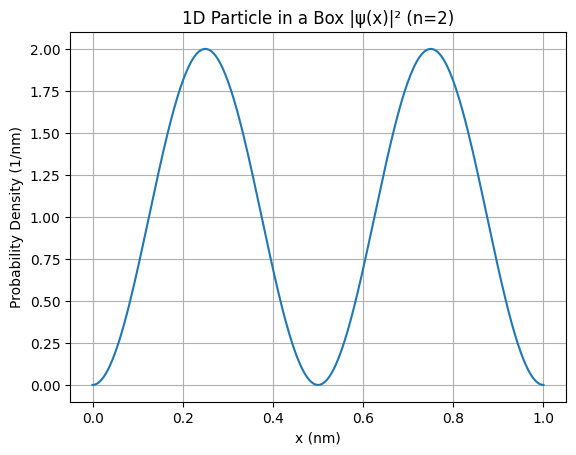

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def prob_density_1D(x, n, L):
    return (2 / L) * (np.sin(n * np.pi * x / L))**2

n = 2
L = 1.0

# Integrate to check normalization
result, _ = quad(lambda x: prob_density_1D(x, n, L), 0, L)
print(f"1D normalization integral = {result:.6f}")

# Plot
x_vals = np.linspace(0, L, 300)
y_vals = prob_density_1D(x_vals, n, L)

plt.plot(x_vals, y_vals)
plt.title(f'1D Particle in a Box |ψ(x)|² (n={n})')
plt.xlabel('x (nm)')
plt.ylabel('Probability Density (1/nm)')
plt.grid(True)
plt.show()

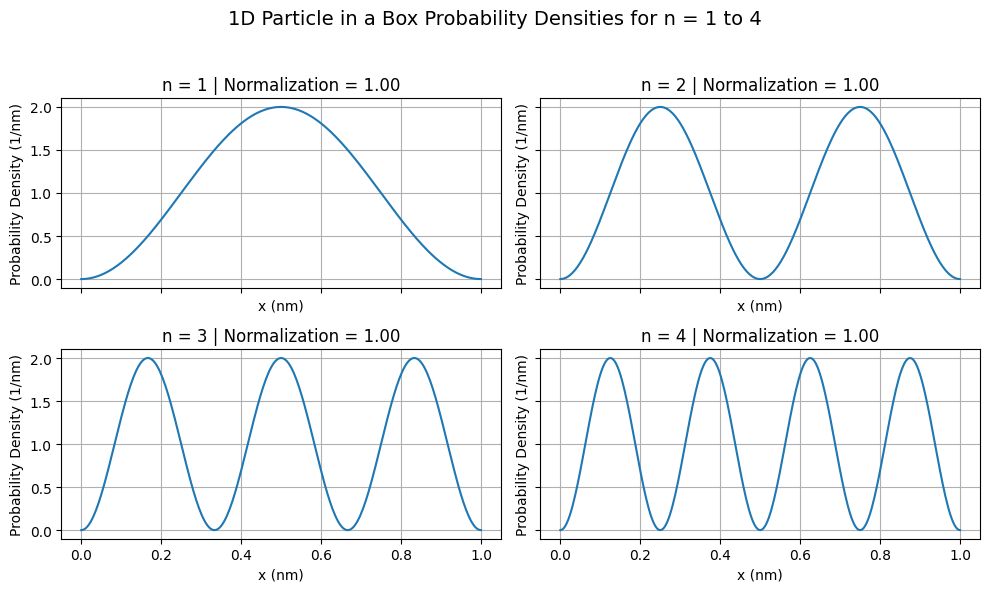

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# 1D normalized probability density
def prob_density_1D(x, n, L):
    return (2 / L) * (np.sin(n * np.pi * x / L))**2

L = 1.0
x_vals = np.linspace(0, L, 300)

# Set up 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.flatten()  # Makes it easier to index from 0 to 3

for i, n in enumerate(range(1, 5)):
    y_vals = prob_density_1D(x_vals, n, L)

    # Integrate to verify normalization
    result, _ = quad(lambda x: prob_density_1D(x, n, L), 0, L)
    
    ax = axes[i]
    ax.plot(x_vals, y_vals)
    ax.set_title(f'n = {n} | Normalization = {result:.2f}')
    ax.set_xlabel('x (nm)')
    ax.set_ylabel('Probability Density (1/nm)')
    ax.grid(True)

# Add overall title
fig.suptitle("1D Particle in a Box Probability Densities for n = 1 to 4", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for the suptitle
plt.show()


### 2D Box
$$
\psi_{n,m}(x, y) = \sqrt{\frac{4}{L_x L_y}} \sin\left(\frac{n\pi x}{L_x}\right)\sin\left(\frac{m\pi y}{L_y}\right)
$$
$$
|\psi_{n,m}(x,y)|^2 = \frac{4}{L_x L_y} \sin^2\left(\frac{n\pi x}{L_x}\right) \sin^2\left(\frac{m\pi y}{L_y}\right)
$$

2D normalization integral = 1.000000


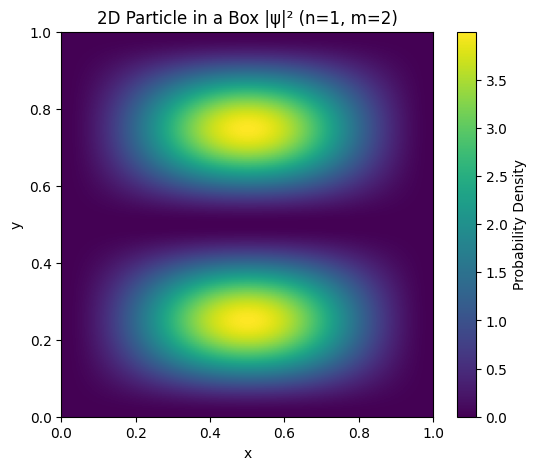

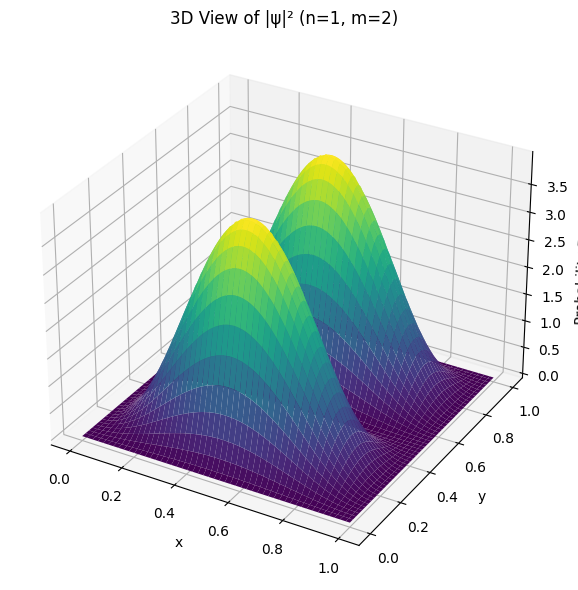

In [12]:
from scipy.integrate import dblquad

def prob_density_2D(x, y, n, m, Lx, Ly):
    norm = 4 / (Lx * Ly)
    return norm * (np.sin(n * np.pi * x / Lx)**2) * (np.sin(m * np.pi * y / Ly)**2)

n, m = 1, 2
Lx, Ly = 1.0, 1.0

# Normalize
result, _ = dblquad(lambda y, x: prob_density_2D(x, y, n, m, Lx, Ly),
                    0, Lx, lambda x: 0, lambda x: Ly)
print(f"2D normalization integral = {result:.6f}")

# Create grid for plotting
x = np.linspace(0, Lx, 200)
y = np.linspace(0, Ly, 200)
X, Y = np.meshgrid(x, y)
Z = prob_density_2D(X, Y, n, m, Lx, Ly)


# 2D heatmap
plt.figure(figsize=(6, 5))
plt.imshow(Z, extent=[0, Lx, 0, Ly], origin='lower', cmap='viridis', aspect='auto')
plt.colorbar(label='Probability Density')
plt.title(f'2D Particle in a Box |ψ|² (n={n}, m={m})')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 3D surface plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title(f'3D View of |ψ|² (n={n}, m={m})')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Probability Density')
plt.tight_layout()
plt.show()


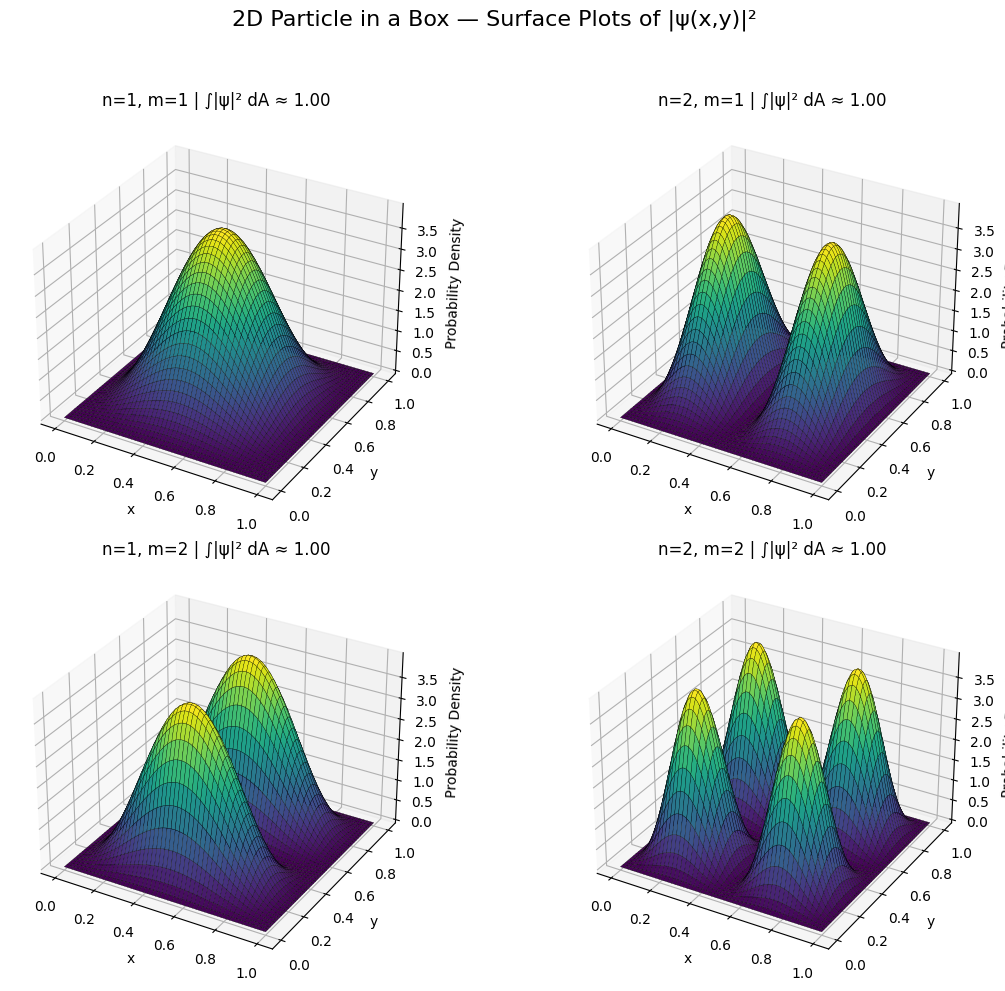

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# 2D normalized probability density function
def prob_density_2D(x, y, n, m, Lx, Ly):
    norm = 4 / (Lx * Ly)
    return norm * (np.sin(n * np.pi * x / Lx)**2) * (np.sin(m * np.pi * y / Ly)**2)

# Set box size and grid
Lx = Ly = 1.0
x = np.linspace(0, Lx, 100)
y = np.linspace(0, Ly, 100)
X, Y = np.meshgrid(x, y)

# Quantum number pairs
quantum_numbers = [(1, 1), (2, 1), (1, 2), (2, 2)]

# Set up figure
fig = plt.figure(figsize=(12, 10))
for i, (n, m) in enumerate(quantum_numbers):
    Z = prob_density_2D(X, Y, n, m, Lx, Ly)
    
    # Check normalization
    result, _ = dblquad(lambda y, x: prob_density_2D(x, y, n, m, Lx, Ly),
                        0, Lx, lambda x: 0, lambda x: Ly)
    
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', linewidth=0.2)
    ax.set_title(f'n={n}, m={m} | ∫|ψ|² dA ≈ {result:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Probability Density')

fig.suptitle("2D Particle in a Box — Surface Plots of |ψ(x,y)|²", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



| Quantum Numbers | Node Orientation |
|-----------------|------------------|
| \( n=1, m=1 \) | No nodes — ground state |
| \( n=2, m=1 \) | Node along \( x = 0.5 \) |
| \( n=1, m=2 \) | Node along \( y = 0.5 \) |
| \( n=2, m=2 \) | Nodes along both x and y midpoints |

### 3D Box
$$
\psi_{n,m,l}(x,y,z) = \sqrt{\frac{8}{L_x L_y L_z}} \sin\left(\frac{n\pi x}{L_x}\right)\sin\left(\frac{m\pi y}{L_y}\right)\sin\left(\frac{l\pi z}{L_z}\right)
$$

$$
|\psi_{n,m,l}(x,y,z)|^2 = \frac{8}{L_x L_y L_z} \sin^2\left(\frac{n\pi x}{L_x}\right)\sin^2\left(\frac{m\pi y}{L_y}\right)\sin^2\left(\frac{l\pi z}{L_z}\right)
$$

<div class="alert alert-info">  
    
<center>The following code generates a video that moves up the z-axis</center> 
</div>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Quantum numbers and box size
n, m, l = 2, 2, 3
Lx = Ly = Lz = 1.0

# Probability density function
def prob_density_3D(x, y, z):
    norm = 8 / (Lx * Ly * Lz)
    return norm * (np.sin(n * np.pi * x / Lx)**2) * \
                  (np.sin(m * np.pi * y / Ly)**2) * \
                  (np.sin(l * np.pi * z / Lz)**2)

# Create grid
x = np.linspace(0, Lx, 200)
y = np.linspace(0, Ly, 200)
X, Y = np.meshgrid(x, y)
z_vals = np.linspace(0, Lz, 60)
Z_slices = [prob_density_3D(X, Y, z) for z in z_vals]
max_val = np.max(Z_slices)

from scipy.integrate import tplquad
integral_result, error_estimate = tplquad(
    lambda z, y, x: prob_density_3D(x, y, z),
    0, Lx,
    lambda x: 0, lambda x: Ly,
    lambda x, y: 0, lambda x, y: Lz
)
print(f"3D normalization integral = {integral_result:.6f} (error ≈ {error_estimate:.1e})")

# Set up figure
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(Z_slices[0], extent=[0, Lx, 0, Ly], origin='lower',
               cmap='viridis', vmin=0, vmax=max_val, aspect='auto')
cbar = plt.colorbar(im, ax=ax, label='Probability Density (1/nm³)')
title = ax.set_title("")
ax.set_xlabel("x (nm)")
ax.set_ylabel("y (nm)")

# Animation function
def update(frame):
    im.set_array(Z_slices[frame])
    title.set_text(f"|ψ(x,y,z)|², z = {z_vals[frame]:.2f} nm")
    return im, title

ani = animation.FuncAnimation(fig, update, frames=len(z_vals), interval=100, blit=False)

# Save to GIF (requires ImageMagick) or use mp4 instead
# ani.save("quantum_box.gif", writer="imagemagick")  # Uncomment if ImageMagick is installed

# Save as MP4 using ffmpeg (more reliable)
ani.save("quantum_box.mp4", writer="ffmpeg")

plt.close(fig)  # This prevents the still frame from being shown


# Display inline in notebook
HTML(f"""
<video width="500" controls>
  <source src="quantum_box.mp4" type="video/mp4">
</video>
""")


3D normalization integral = 1.000000 (error ≈ 1.1e-08)


$$
|\psi(x, y, z)|^2 = \frac{8}{L_x L_y L_z} \cdot \sin^2\left(\frac{2\pi x}{L_x}\right) \cdot \sin^2\left(\frac{2\pi y}{L_y}\right) \cdot \sin^2\left(\frac{3\pi z}{L_z}\right)
$$

---

## Nodal Planes

Each quantum number **creates \( n-1 \), \( m-1 \), and \( l-1 \) nodal planes** in the respective direction:

| Direction | Quantum # | Nodal Planes | Node Locations |
|----------:|:----------|:-------------|:---------------|
| **x**     | `n = 2`   | 1            | $ x = 0.5 $ |
| **y**     | `m = 2`   | 1            | $ y = 0.5 $ |
| **z**     | `l = 3`   | 2            | $ z = \frac{1}{3}, \frac{2}{3} $ |
So we expect 12 regions of particle density
---
**Go to the code cell above and change the values of n,m and l. Rerun the code and then see if the updated animation correctly predicts the number of surfaces.**



# 4. Scipy.optimize is used for optimization tasks in Python
common tools are:

- **Scalar minimization**: Optimize functions of one variable.
- **Multivariate minimization**: Optimize functions of several variables.
- **Curve fitting**: Fit models to data.
- **Root finding**: Find solutions to equations (`f(x) = 0`).
- **Constrained optimization**: Optimization with constraints (bounds, equalities, inequalities).

1. Scalar Minimization (Single Variable)
| Function               | Description                                                              |
|------------------------|---------------------------------------------------------------------------|
| `minimize_scalar()`    | Finds the minimum of a scalar (1D) function.                             |

2. Multivariate Minimization (Multiple Variables)
| Function               | Description                                                              |
|------------------------|---------------------------------------------------------------------------|
| `minimize()`           | General-purpose minimizer for multivariate functions.                    |
| `basinhopping()`       | Global optimizer that combines local minimization with random perturbation. |
| `shgo()`               | Global optimization method using simplicial homology (supports constraints). |
| `dual_annealing()`     | Simulated annealing for global optimization.                             |
| `differential_evolution()` | Evolutionary algorithm for global optimization.                     |

3. Root Finding (Solving f(x) = 0)
| Function               | Description                                                              |
|------------------------|---------------------------------------------------------------------------|
| `root_scalar()`        | Finds the root of a 1D function.                                          |
| `root()`               | Finds the root of multivariate systems.                                   |
| `brentq()`, `brenth()` | Root-finding methods that require a sign change in the interval.          |
| `newton()`             | Newton-Raphson method for root finding (optionally uses derivative).     |
| `fixed_point()`        | Solves `f(x) = x` for fixed points.                                       |

4. Curve Fitting / Least Squares
| Function               | Description                                                              |
|------------------------|---------------------------------------------------------------------------|
| `curve_fit()`          | Fits a nonlinear model to data (wraps `least_squares`).                  |
| `least_squares()`      | Solves nonlinear least-squares problems (general-purpose).               |

5. Constrained Optimization
| Object / Function       | Description                                                              |
|-------------------------|---------------------------------------------------------------------------|
| `Bounds`                | Specify variable bounds for constraints.                                 |
| `LinearConstraint`      | Define constraints of the form `Ax <= b`.                                |
| `NonlinearConstraint`   | Define nonlinear constraint conditions.                                  |

6. Linear Programming
| Function               | Description                                                              |
|------------------------|---------------------------------------------------------------------------|
| `linprog()`            | Solves linear programming problems.                                       |

7. Results and Output
| Class                  | Description                                                              |
|------------------------|---------------------------------------------------------------------------|
| `OptimizeResult`       | Object returned from most optimizers containing `.x`, `.fun`, `.success`, etc. |



## Scalar Minimization
What is the minimum for the following?
$$
(x - 2)x (x + 2)^2
$$

In [15]:
from scipy.optimize import minimize_scalar

def f(x):
    return (x - 2) * x * (x + 2)**2

res = minimize_scalar(f)
print(f"Minimum found at x = {res.x}")
print(f"Minimum function value = {res.fun}")

Minimum found at x = 1.2807764040333458
Minimum function value = -9.914949590828147


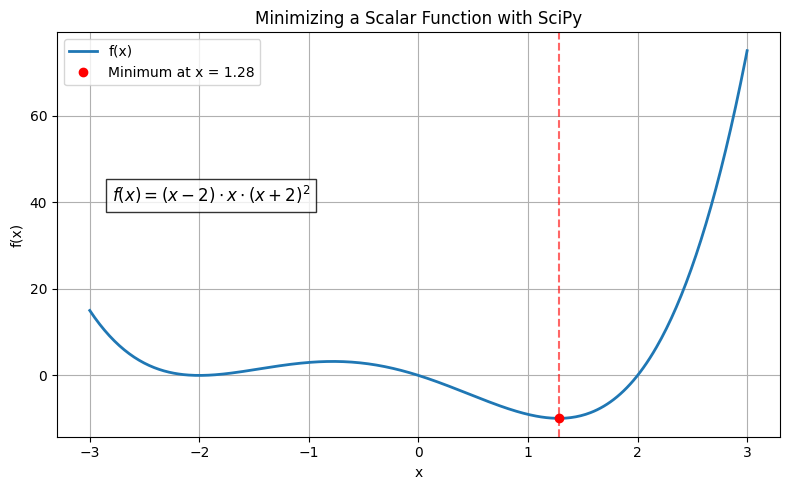

Minimum found at x = 1.2807764040333458
Minimum function value = -9.914949590828147


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function to minimize
def f(x):
    return (x - 2) * x * (x + 2)**2

# Generate x values for plotting
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

# Perform scalar minimization
res = minimize_scalar(f)
x_min = res.x
y_min = res.fun

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x)', linewidth=2)
plt.plot(x_min, y_min, 'ro', label=f'Minimum at x = {x_min:.2f}')
plt.axvline(x_min, color='r', linestyle='--', alpha=0.6)

# Add function equation to the plot
equation = r"$f(x) = (x - 2) \cdot x \cdot (x + 2)^2$"
plt.text(-2.8, 40, equation, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.title('Minimizing a Scalar Function with SciPy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
res = minimize_scalar(f)
print(f"Minimum found at x = {res.x}")
print(f"Minimum function value = {res.fun}")

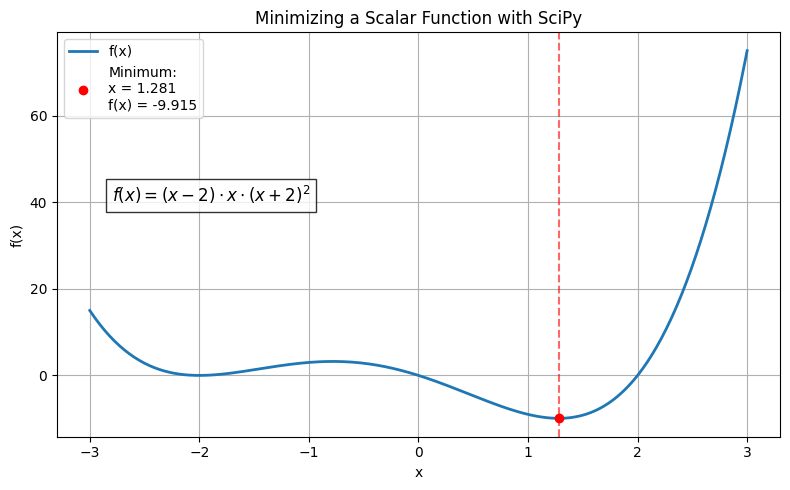

Minimum found at x = 1.2807764040333458
Minimum function value = -9.914949590828147


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Define the function to minimize
def f(x):
    return (x - 2) * x * (x + 2)**2

# Generate x values for plotting
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)

# Perform scalar minimization
res = minimize_scalar(f)
x_min = res.x
y_min = res.fun

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f(x)', linewidth=2)
plt.plot(x_min, y_min, 'ro', label=f"Minimum:\nx = {x_min:.3f}\nf(x) = {y_min:.3f}")
plt.axvline(x_min, color='r', linestyle='--', alpha=0.6)

# Add function equation to the plot
equation = r"$f(x) = (x - 2) \cdot x \cdot (x + 2)^2$"
plt.text(-2.8, 40, equation, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.title('Minimizing a Scalar Function with SciPy')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Still print values below graph if you want
print(f"Minimum found at x = {x_min}")
print(f"Minimum function value = {y_min}")


## Multivariate Minimization

In [18]:
from scipy.optimize import minimize
import numpy as np

# Example: energy surface with two bond angles
def energy(x):
    a, b = x
    return (a - 109.5)**2 + (b - 109.5)**2  # Deviation from ideal tetrahedral angle

res = minimize(energy, x0=[100, 100])
print(f"Optimal angles = {res.x}")


Optimal angles = [109.50000066 109.50000066]


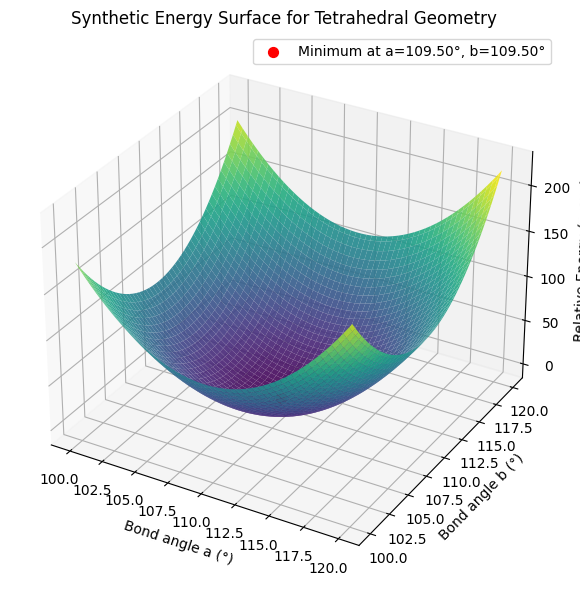

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the energy function
def energy(x):
    a, b = x
    return (a - 109.5)**2 + (b - 109.5)**2

# Perform the minimization
res = minimize(energy, x0=[100, 100])
a_min, b_min = res.x

# Create a grid for visualization
a = np.linspace(100, 120, 100)
b = np.linspace(100, 120, 100)
A, B = np.meshgrid(a, b)
Z = (A - 109.5)**2 + (B - 109.5)**2

# Plot the energy surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# More descriptive legend
label = f'Minimum at a={a_min:.2f}°, b={b_min:.2f}°'
ax.scatter(a_min, b_min, energy([a_min, b_min]), color='red', s=50, label=label)

# Axis labels and title
ax.set_xlabel('Bond angle a (°)')
ax.set_ylabel('Bond angle b (°)')
ax.set_zlabel('Relative Energy (proxy)')
ax.set_title('Synthetic Energy Surface for Tetrahedral Geometry')
ax.legend()

plt.tight_layout()
plt.show()


## Root Finding
This script models the ICE table (Initial, Change, Equilibrium) for acetic acid dissociation:

$$
\text{CH}_3\text{COOH} \rightleftharpoons \text{CH}_3\text{COO}^- + \text{H}^+
$$

You're solving for **`x = [H⁺]`** at equilibrium using the Ka expression:

$$
K_a = \frac{[H^+]^2}{[CH_3COOH]_{\text{initial}} - [H^+]}
$$

Here:
- $ K_a = 1.8 \times 10^{-5} $
- Initial acetic acid concentration = 0.1 M
- The equation becomes:
  ```python
  Ka - (x**2 / (0.1 - x)) = 0
  ```

In [20]:
from scipy.optimize import root_scalar

def equilibrium(x):
    Ka = 1.8e-5  # Acetic acid Ka
    return Ka - (x**2 / (0.1 - x))  # ICE table expression

res = root_scalar(equilibrium, bracket=[0, 0.09])
print(f"[H⁺] at equilibrium = {res.root:.5f} M")


[H⁺] at equilibrium = 0.00133 M


## Curve Fitting (Beer-Lambert law)

Epsilon (molar absorptivity) = 1.540 L/(mol·cm)


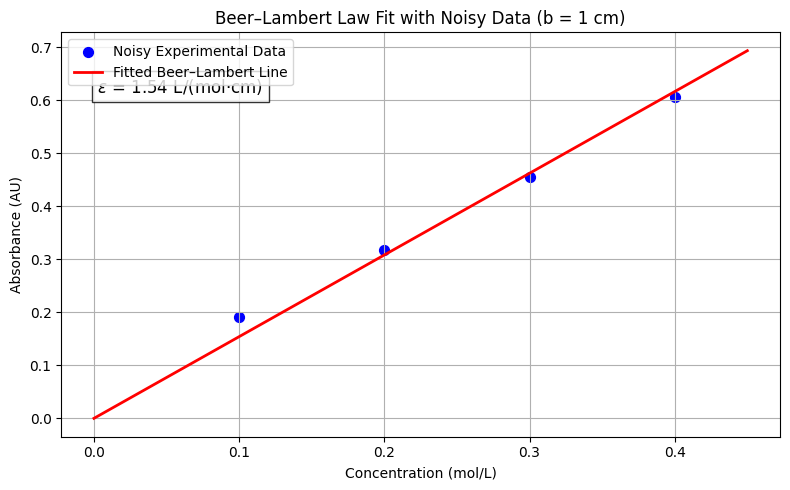

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define Beer–Lambert Law with fixed path length b = 1 cm
def beer_lambert(c, epsilon):
    b = 1  # Path length in cm
    return epsilon * b * c

# Original concentration (mol/L) and absorbance data
concentration = np.array([0.1, 0.2, 0.3, 0.4])
true_absorbance = np.array([0.15, 0.31, 0.45, 0.61])  # True absorbance data

# Add random noise to the absorbance data
noise = np.random.normal(0, 0.02, size=concentration.shape)  # Mean = 0, Std = 0.02
noisy_absorbance = true_absorbance + noise

# Fit the curve to determine epsilon
params, _ = curve_fit(beer_lambert, concentration, noisy_absorbance)
epsilon = params[0]

# Print the fitted molar absorptivity
print(f"Epsilon (molar absorptivity) = {epsilon:.3f} L/(mol·cm)")

# Generate fit line
c_fit = np.linspace(0, 0.45, 100)
a_fit = beer_lambert(c_fit, epsilon)

# Plot the data and fit
plt.figure(figsize=(8, 5))
plt.scatter(concentration, noisy_absorbance, color='blue', label='Noisy Experimental Data', s=50)
plt.plot(c_fit, a_fit, 'r-', label='Fitted Beer–Lambert Line', linewidth=2)
plt.title('Beer–Lambert Law Fit with Noisy Data (b = 1 cm)')
plt.xlabel('Concentration (mol/L)')
plt.ylabel('Absorbance (AU)')
plt.legend()
plt.grid(True)

# Annotate the plot with the fitted epsilon value without an arrow
annotation_text = fr"$\epsilon$ = {epsilon:.2f} L/(mol·cm)"
plt.annotate(annotation_text, xy=(0.05, 0.85), xycoords='axes fraction',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


Fitted Initial Quantity (N0): 105.25
Fitted Decay Constant (lambda): 0.5477
Calculated Half-Life: 1.27 time units


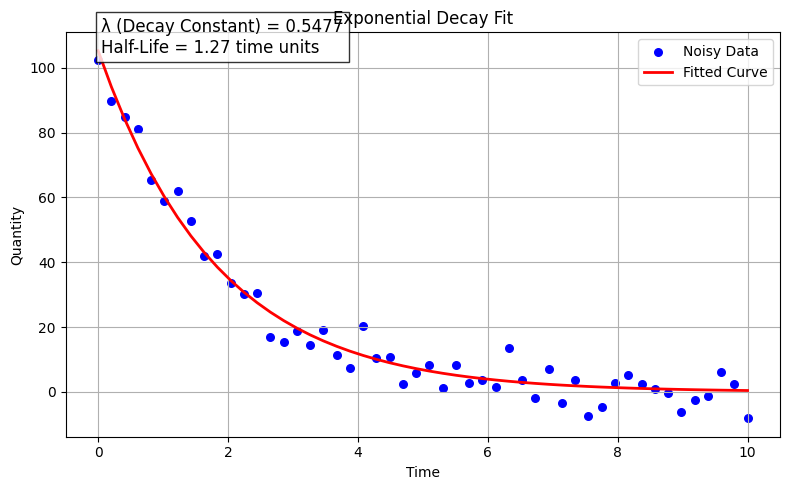

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay function
def decay_function(t, N0, lambda_):
    return N0 * np.exp(-lambda_ * t)

# Generate synthetic data
np.random.seed(42)  # For reproducibility
time = np.linspace(0, 10, num=50)  # Time from 0 to 10 units
true_N0 = 100  # True initial quantity
true_lambda = 0.5  # True decay constant
noise = np.random.normal(0, 5, size=time.shape)  # Gaussian noise
quantity = decay_function(time, true_N0, true_lambda) + noise  # Noisy measurements

# Fit the data to the exponential decay function
popt, pcov = curve_fit(decay_function, time, quantity, p0=(true_N0, true_lambda))
fitted_N0, fitted_lambda = popt

# Calculate the half-life
half_life = np.log(2) / fitted_lambda

# Print the fitted parameters
print(f"Fitted Initial Quantity (N0): {fitted_N0:.2f}")
print(f"Fitted Decay Constant (lambda): {fitted_lambda:.4f}")
print(f"Calculated Half-Life: {half_life:.2f} time units")

# Plot the data and the fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(time, quantity, color='blue', label='Noisy Data', s=30)
plt.plot(time, decay_function(time, fitted_N0, fitted_lambda), 'r-', label='Fitted Curve', linewidth=2)
plt.title('Exponential Decay Fit')
plt.xlabel('Time')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)

# Annotate the plot with the decay constant and half-life
annotation_text = f"λ (Decay Constant) = {fitted_lambda:.4f}\nHalf-Life = {half_life:.2f} time units"
plt.annotate(annotation_text, xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


Fitted decay constant (lambda): 0.3007
Calculated half-life: 2.3052 time units


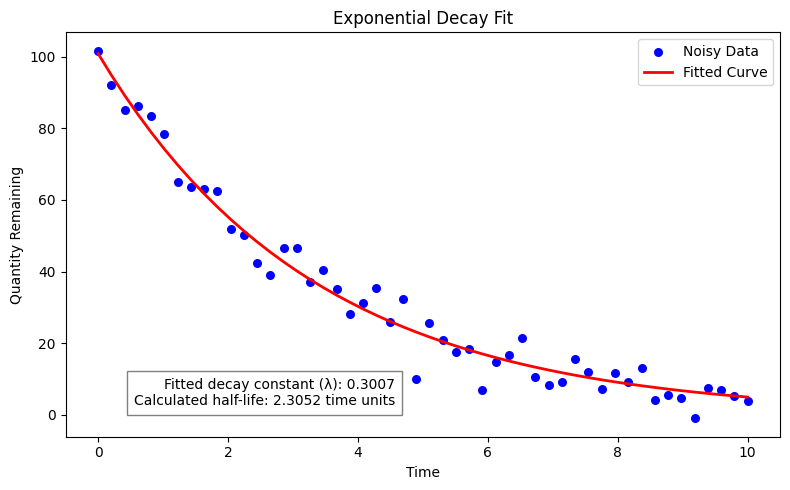

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decay function
def decay_function(t, N0, lambda_):
    return N0 * np.exp(-lambda_ * t)

# Generate synthetic data
#np.random.seed(444)  # For reproducibility
time = np.linspace(0, 10, num=50)  # Time from 0 to 10 units
true_N0 = 100  # True initial quantity
true_lambda = 0.3  # True decay constant
decay_data = decay_function(time, true_N0, true_lambda)
noise = np.random.normal(0, 5, size=decay_data.shape)  # Add some noise
noisy_decay_data = decay_data + noise

# Perform curve fitting
popt, pcov = curve_fit(decay_function, time, noisy_decay_data, p0=(true_N0, true_lambda))
fitted_N0, fitted_lambda = popt

# Calculate half-life
half_life = np.log(2) / fitted_lambda

# Print the decay constant and half-life
print(f"Fitted decay constant (lambda): {fitted_lambda:.4f}")
print(f"Calculated half-life: {half_life:.4f} time units")

# Plot the data and the fitted curve
plt.figure(figsize=(8, 5))
plt.scatter(time, noisy_decay_data, color='blue', label='Noisy Data', s=30)
plt.plot(time, decay_function(time, *popt), 'r-', label='Fitted Curve', linewidth=2)
plt.title('Exponential Decay Fit')
plt.xlabel('Time')
plt.ylabel('Quantity Remaining')
plt.legend()
plt.grid(False)  # Remove grid lines

# Add annotation below the x-axis label
annotation_text = f"Fitted decay constant (λ): {fitted_lambda:.4f}\nCalculated half-life: {half_life:.4f} time units"
plt.figtext(0.5, 0.18, annotation_text, ha="right", fontsize=10, bbox={"facecolor": "white", "alpha": 0.5, "pad": 5})

plt.tight_layout()
plt.show()


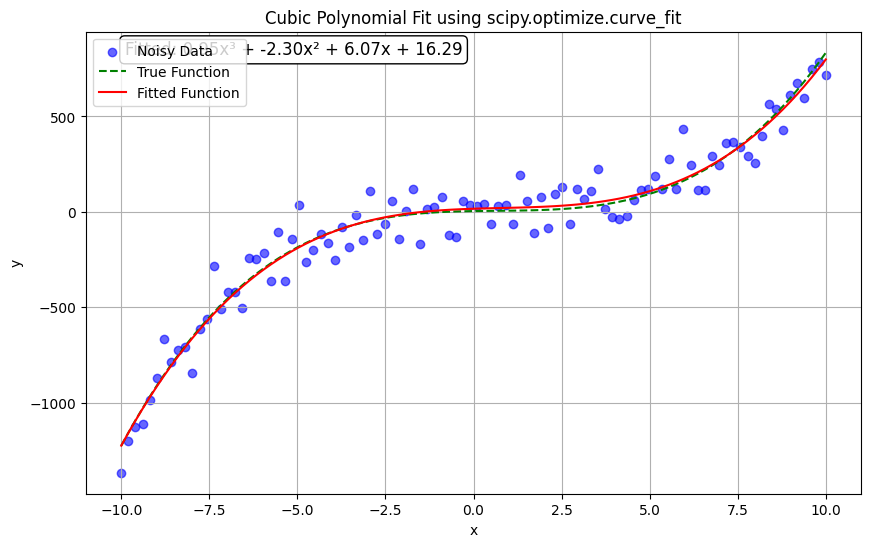

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Generate synthetic data
# --------------------------------
# Define true coefficients for the cubic polynomial: y = a*x^3 + b*x^2 + c*x + d
a_true, b_true, c_true, d_true = 1.0, -2.0, 3.0, 4.0

# Generate 100 x-values evenly spaced between -10 and 10
x_data = np.linspace(-10, 10, 100)

# Compute corresponding y-values using the true polynomial coefficients
y_true = a_true * x_data**3 + b_true * x_data**2 + c_true * x_data + d_true

# Add normally distributed noise to the y-values to simulate real-world data
noise = np.random.normal(0, 100, size=x_data.size)
y_data = y_true + noise

# Step 2: Define the cubic polynomial model function
# ---------------------------------------------------
def cubic_model(x, a, b, c, d):
    """
    Cubic polynomial model: y = a*x^3 + b*x^2 + c*x + d
    """
    return a * x**3 + b * x**2 + c * x + d

# Step 3: Perform curve fitting using scipy's curve_fit
# ------------------------------------------------------
# Provide an initial guess for the parameters (optional but can aid convergence)
initial_guess = [1.0, 1.0, 1.0, 1.0]

# Use curve_fit to find the optimal parameters that fit the cubic model to the data
popt, pcov = curve_fit(cubic_model, x_data, y_data, p0=initial_guess)

# Extract the optimal parameters
a_fit, b_fit, c_fit, d_fit = popt

# Step 4: Visualize the original data and the fitted curve
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))

# Scatter plot of the noisy data
plt.scatter(x_data, y_data, color='blue', label='Noisy Data', alpha=0.6)

# Plot of the true underlying cubic function (without noise)
plt.plot(x_data, y_true, color='green', linestyle='--', label='True Function')

# Plot of the fitted cubic function using the optimized parameters
plt.plot(x_data, cubic_model(x_data, *popt), color='red', label='Fitted Function')

# Annotate the plot with the fitted equation
equation = f'Fitted: {a_fit:.2f}x³ + {b_fit:.2f}x² + {c_fit:.2f}x + {d_fit:.2f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))

# Add labels, title, legend, and grid
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cubic Polynomial Fit using scipy.optimize.curve_fit')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


### Understanding the polynomial fit
Lets focus on this section here:
```python
# Step 3: Perform curve fitting using scipy's curve_fit
# ------------------------------------------------------

# Provide an initial guess for the parameters (optional but can aid convergence)
initial_guess = [1.0, 1.0, 1.0, 1.0]

# Use curve_fit to find the optimal parameters that fit the cubic model to the data
popt, pcov = curve_fit(cubic_model, x_data, y_data, p0=initial_guess)

# Extract the optimal parameters
a_fit, b_fit, c_fit, d_fit = popt
```

1. Initial Guess (`p0`):

   - The `initial_guess` provides starting values for the parameters \( a \), \( b \), \( c \), and \( d \) in your cubic model. While `curve_fit` can often determine reasonable starting points on its own, supplying an initial guess can significantly enhance the convergence and accuracy of the fitting process, especially for complex models.

   - In non-linear curve fitting, the optimization algorithm searches for the set of parameters that minimize the difference between your model and the data. Providing a good initial guess helps the algorithm start closer to the optimal solution, reducing computation time and the risk of converging to a local minimum instead of the global minimum.

   - If you have prior knowledge or intuition about the parameter values based on the data's nature or previous experiments, you can set `initial_guess` accordingly. If not, starting with generic values like `[1.0, 1.0, 1.0, 1.0]` is common, but be aware that poor initial guesses can lead to slow convergence or fitting failures.

2. Curve Fitting with `curve_fit`:

   - Function Call:`curve_fit` is called with the following arguments:

     - `cubic_model`: Your defined function representing the cubic relationship \( y = ax^3 + bx^2 + cx + d \).

     - `x_data`: The array of independent variable data points.

     - `y_data`: The array of dependent variable data points.

     - `p0=initial_guess`: The initial guess for the parameters.

   - `curve_fit` uses non-linear least squares to fit the `cubic_model` to the data. It adjusts the parameters \( a \), \( b \), \( c \), and \( d \) to minimize the sum of the squared residuals (the differences between the observed and predicted values).

   - **Outputs:**

     - `popt` (Optimal Parameters): An array containing the optimal values for the parameters \( a \), \( b \), \( c \), and \( d \) that best fit the data.

     - `pcov` (Covariance Matrix): The estimated covariance matrix of `popt`. The diagonal elements provide the variance of each parameter estimate, which can be used to compute standard errors.

3. Extracting Optimal Parameters:

   - Assignment: The optimal parameters are extracted from `popt` and assigned to `a_fit`, `b_fit`, `c_fit`, and `d_fit`. These represent the best estimates for the coefficients in your cubic model.

## Constrained Optimization
We aim to find the radius $ r $ and height $ h $ of a cylinder that minimize the surface area, given a fixed volume $ V $. The surface area $ A $ of a cylinder is given by:

$$ A = 2\pi r^2 + 2\pi r h $$

The volume constraint is:
$$ V = \pi r^2 h $$

We'll use Python's `scipy.optimize` module to perform this constrained optimization. The steps include:

1. Define the Objective Function: The surface area to be minimized.

2. Set Up the Constraint: The volume must remain constant.

3. Provide an Initial Guess: Starting values for \( r \) and \( h \).

4. Perform the Optimization: Using `scipy.optimize.minimize` with the Sequential Least Squares Programming (SLSQP) method, which handles constraints effectively.


In [25]:
import numpy as np
from scipy.optimize import minimize

# Given volume in cubic centimeters
V = 1000  # cm³

# Objective function: Surface area of the cylinder
def surface_area(x):
    r, h = x
    return 2 * np.pi * r**2 + 2 * np.pi * r * h

# Constraint: Volume of the cylinder remains constant
def volume_constraint(x):
    r, h = x
    return np.pi * r**2 * h - V

# Initial guess: radius and height
initial_guess = [5, 10]  # Arbitrary starting values

# Bounds: radius and height must be positive
bounds = [(0.1, None), (0.1, None)]  # Preventing zero or negative dimensions

# Define the constraint in the form required by 'minimize'
constraint = {'type': 'eq', 'fun': volume_constraint}

# Perform the optimization
result = minimize(surface_area, initial_guess, method='SLSQP', bounds=bounds, constraints=constraint)

# Extract the optimized radius and height
optimized_radius, optimized_height = result.x

# Display the results
print(f"Optimized Radius: {optimized_radius:.2f} cm")
print(f"Optimized Height: {optimized_height:.2f} cm")
print(f"Minimum Surface Area: {result.fun:.2f} cm²")

Optimized Radius: 5.52 cm
Optimized Height: 10.43 cm
Minimum Surface Area: 553.79 cm²



**Explanation:**

- Objective Function (`surface_area`): Calculates the total surface area of the cylinder based on radius \( r \) and height \( h \).

- Constraint (`volume_constraint`): Ensures that the product \( \pi r^2 h \) equals the specified volume \( V \).

- Initial Guess: Provides starting values for \( r \) and \( h \) to initiate the optimization process.

- Bounds: Sets lower limits for \( r \) and \( h \) to prevent non-physical negative or zero dimensions.

- Optimization Method: Utilizes the SLSQP algorithm, suitable for problems with equality constraints.

# Acknowledgements
This content was developed with assistance from [Perplexity AI](https://www.perplexity.ai/) and [Chat GPT](https://chatgpt.com/). Multiple queries were made during the Fall 2024 and the Spring 2025.